In [251]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [252]:
df=pd.read_csv("listings.csv")

In [253]:
#Verificamos información del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375 entries, 0 to 1374
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            1375 non-null   int64  
 1   listing_url                                   1375 non-null   object 
 2   scrape_id                                     1375 non-null   int64  
 3   last_scraped                                  1375 non-null   object 
 4   source                                        1375 non-null   object 
 5   name                                          1375 non-null   object 
 6   description                                   1366 non-null   object 
 7   neighborhood_overview                         705 non-null    object 
 8   picture_url                                   1375 non-null   object 
 9   host_id                                       1375 non-null   i

In [254]:
valores_nulos=df.isnull().sum()
valores_nulos

id                                                0
listing_url                                       0
scrape_id                                         0
last_scraped                                      0
source                                            0
                                               ... 
calculated_host_listings_count                    0
calculated_host_listings_count_entire_homes       0
calculated_host_listings_count_private_rooms      0
calculated_host_listings_count_shared_rooms       0
reviews_per_month                               336
Length: 79, dtype: int64

In [255]:
df1 = df.fillna(method="bfill").fillna(method="ffill")

/var/folders/rn/3d02syds5p99hnhh5p4p92jh0000gn/T/ipykernel_23408/3916580684.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1 = df.fillna(method="bfill").fillna(method="ffill")


In [256]:
valores_nulos=df1.isnull().sum()
valores_nulos

id                                              0
listing_url                                     0
scrape_id                                       0
last_scraped                                    0
source                                          0
                                               ..
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
reviews_per_month                               0
Length: 79, dtype: int64

In [257]:
# Columnas cuantitativas
cuanti = df[["id", "scrape_id", "host_id", "host_listings_count", "host_total_listings_count",
          "number_of_reviews", "number_of_reviews_ltm", "number_of_reviews_l30d",
          "availability_30", "availability_60", "availability_90", "availability_365",
          "review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness",
          "review_scores_checkin", "review_scores_communication", "review_scores_location",
          "review_scores_value", "calculated_host_listings_count",
          "calculated_host_listings_count_entire_homes",
          "calculated_host_listings_count_private_rooms",
          "calculated_host_listings_count_shared_rooms", "reviews_per_month", "accommodates",
          "bathrooms", "bedrooms", "beds", "latitude", "longitude", "price", "minimum_nights",
          "maximum_nights", "minimum_minimum_nights", "maximum_minimum_nights",
          "minimum_maximum_nights", "maximum_maximum_nights", "minimum_nights_avg_ntm",
          "maximum_nights_avg_ntm", "estimated_occupancy_l365d", "estimated_revenue_l365d"]]

# Columnas cualitativas
cuali = df[["listing_url", "last_scraped", "source", "name", "description",
         "neighborhood_overview", "picture_url", "host_url", "host_name", "host_since",
         "host_location", "host_about", "host_response_time", "host_response_rate",
         "host_acceptance_rate", "host_is_superhost", "host_thumbnail_url",
         "host_picture_url", "host_neighbourhood", "host_verifications", "host_has_profile_pic",
         "host_identity_verified", "neighbourhood", "neighbourhood_cleansed",
         "neighbourhood_group_cleansed", "property_type", "room_type", "bathrooms_text",
         "amenities", "calendar_updated", "has_availability", "calendar_last_scraped",
         "first_review", "last_review", "license", "instant_bookable"]]


<Figure size 1500x800 with 0 Axes>

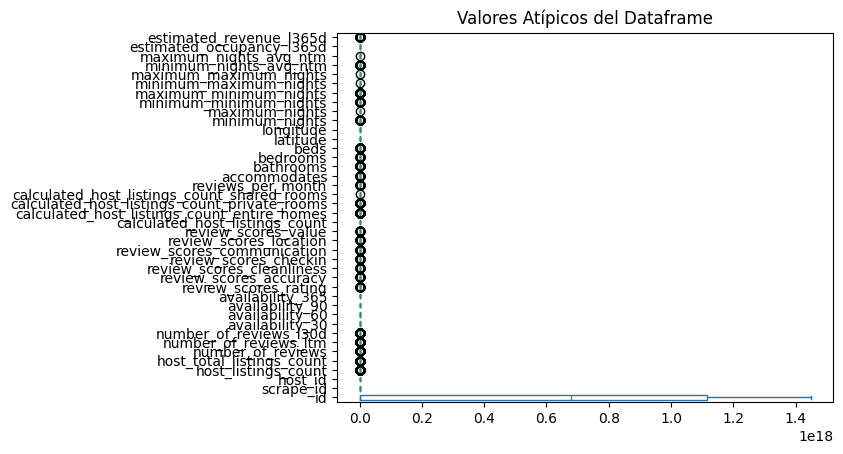

In [258]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
cuanti.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama


In [259]:
###remplazar la variable price 
cuanti['price'] = cuanti['price'].replace('[\$,]', '', regex=True).astype(float)

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
/var/folders/rn/3d02syds5p99hnhh5p4p92jh0000gn/T/ipykernel_23408/444423149.py:2: SyntaxWarning: invalid escape sequence '\$'
  cuanti['price'] = cuanti['price'].replace('[\$,]', '', regex=True).astype(float)
/var/folders/rn/3d02syds5p99hnhh5p4p92jh0000gn/T/ipykernel_23408/444423149.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cuanti['price'] = cuanti['price'].replace('[\$,]', '', regex=True).astype(float)


In [260]:
y=cuanti
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido id                                              2.254908e+18
scrape_id                                       2.025063e+13
host_id                                         7.671800e+08
host_listings_count                             5.534206e+03
host_total_listings_count                       6.455298e+03
number_of_reviews                               3.800149e+02
number_of_reviews_ltm                           7.129560e+01
number_of_reviews_l30d                          6.354530e+00
availability_30                                 3.551030e+01
availability_60                                 8.085242e+01
availability_90                                 1.291582e+02
availability_365                                5.551200e+02
review_scores_rating                            5.875671e+00
review_scores_accuracy                          5.835484e+00
review_scores_cleanliness                       5.931753e+00
review_scores_checkin                           5.774677e+0

In [261]:
df3= cuanti[(y<=Limite_Superior)&(y>=Limite_Inferior)]
df3

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_30,availability_60,...,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,estimated_occupancy_l365d,estimated_revenue_l365d
0,8521,20250625193454,306681,2.0,3.0,79.0,5.0,2.0,0,9,...,2.0,1125.0,2.0,4.0,1125.0,1125.0,2.2,1125.0,30,8100.0
1,11169,20250625193454,40965,4.0,4.0,189.0,10.0,2.0,25,51,...,3.0,14.0,3.0,4.0,14.0,14.0,3.0,14.0,60,9240.0
2,19581,20250625193454,74249,3.0,3.0,12.0,1.0,0.0,15,45,...,10.0,730.0,5.0,10.0,1125.0,1125.0,8.6,1125.0,20,3080.0
3,27498,20250625193454,74249,3.0,3.0,27.0,3.0,0.0,30,60,...,5.0,730.0,4.0,10.0,1125.0,1125.0,8.4,1125.0,30,5490.0
4,79762,20250625193454,430015,1.0,2.0,NaN,29.0,3.0,5,17,...,3.0,365.0,3.0,3.0,365.0,365.0,3.0,365.0,174,52200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1370,1442190452341432060,20250625193454,73885693,2.0,2.0,2.0,2.0,2.0,5,29,...,1.0,120.0,1.0,1.0,120.0,120.0,1.0,120.0,12,3132.0
1371,1443555192209357989,20250625193454,15154687,56.0,58.0,0.0,0.0,0.0,0,0,...,1.0,365.0,1.0,1.0,365.0,365.0,1.0,365.0,0,0.0
1372,1443585853586366833,20250625193454,15154687,56.0,58.0,0.0,0.0,0.0,0,0,...,1.0,365.0,1.0,1.0,365.0,365.0,1.0,365.0,0,0.0
1373,1447874951198409920,20250625193454,20857768,137.0,202.0,0.0,0.0,0.0,1,23,...,30.0,730.0,30.0,30.0,730.0,730.0,30.0,730.0,0,0.0


In [262]:
valores_nulos=df3.isnull().sum()
valores_nulos

id                                                0
scrape_id                                         0
host_id                                           0
host_listings_count                              39
host_total_listings_count                        39
number_of_reviews                                37
number_of_reviews_ltm                            25
number_of_reviews_l30d                           28
availability_30                                   0
availability_60                                   0
availability_90                                   0
availability_365                                  0
review_scores_rating                            349
review_scores_accuracy                          353
review_scores_cleanliness                       348
review_scores_checkin                           347
review_scores_communication                     352
review_scores_location                          353
review_scores_value                             360
calculated_h

In [263]:
data_clean=df3.copy()
data_clean=data_clean.fillna(round(df3.mean(),1))
data_clean

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_30,availability_60,...,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,estimated_occupancy_l365d,estimated_revenue_l365d
0,8521,20250625193454,306681,2.0,3.0,79.0,5.0,2.0,0,9,...,2.0,1125.0,2.0,4.0,1125.0,1125.0,2.2,1125.0,30,8100.0
1,11169,20250625193454,40965,4.0,4.0,189.0,10.0,2.0,25,51,...,3.0,14.0,3.0,4.0,14.0,14.0,3.0,14.0,60,9240.0
2,19581,20250625193454,74249,3.0,3.0,12.0,1.0,0.0,15,45,...,10.0,730.0,5.0,10.0,1125.0,1125.0,8.6,1125.0,20,3080.0
3,27498,20250625193454,74249,3.0,3.0,27.0,3.0,0.0,30,60,...,5.0,730.0,4.0,10.0,1125.0,1125.0,8.4,1125.0,30,5490.0
4,79762,20250625193454,430015,1.0,2.0,40.3,29.0,3.0,5,17,...,3.0,365.0,3.0,3.0,365.0,365.0,3.0,365.0,174,52200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1370,1442190452341432060,20250625193454,73885693,2.0,2.0,2.0,2.0,2.0,5,29,...,1.0,120.0,1.0,1.0,120.0,120.0,1.0,120.0,12,3132.0
1371,1443555192209357989,20250625193454,15154687,56.0,58.0,0.0,0.0,0.0,0,0,...,1.0,365.0,1.0,1.0,365.0,365.0,1.0,365.0,0,0.0
1372,1443585853586366833,20250625193454,15154687,56.0,58.0,0.0,0.0,0.0,0,0,...,1.0,365.0,1.0,1.0,365.0,365.0,1.0,365.0,0,0.0
1373,1447874951198409920,20250625193454,20857768,137.0,202.0,0.0,0.0,0.0,1,23,...,30.0,730.0,30.0,30.0,730.0,730.0,30.0,730.0,0,0.0


In [264]:
Desvst_clean = pd.concat([cuali, data_clean], axis=1)
Desvst_clean

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,...,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,estimated_occupancy_l365d,estimated_revenue_l365d
0,https://www.airbnb.com/rooms/8521,2025-06-26,city scrape,SunsplashedSerenity walk to Harvard & Fresh Pond,"An elegant, sun-splashed, 2 bedroom (+2offices...",Huron Village is known for its charm. We have...,https://a0.muscache.com/pictures/30536/072e0a5...,https://www.airbnb.com/users/show/306681,Janet,2010-12-01,...,2.0,1125.0,2.0,4.0,1125.0,1125.0,2.2,1125.0,30,8100.0
1,https://www.airbnb.com/rooms/11169,2025-06-27,city scrape,Lovely Studio Room: Available for long w/ends,Large sunny room w kitchenette & bath. Foam ma...,The neighborhood is quiet and friendly and our...,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/40965,Judith L,2009-09-24,...,3.0,14.0,3.0,4.0,14.0,14.0,3.0,14.0,60,9240.0
2,https://www.airbnb.com/rooms/19581,2025-06-26,city scrape,"Furnished suite, Windsor","Welcome to Area IV! We are located, convenient...",NaN,https://a0.muscache.com/pictures/188f1b4b-f37b...,https://www.airbnb.com/users/show/74249,Marc E,2010-01-27,...,10.0,730.0,5.0,10.0,1125.0,1125.0,8.6,1125.0,20,3080.0
3,https://www.airbnb.com/rooms/27498,2025-06-27,city scrape,Furnished suite 2 @ the Windsor,"Welcome to Area IV! We are located, convenient...",NaN,https://a0.muscache.com/pictures/bab30c3c-ff3c...,https://www.airbnb.com/users/show/74249,Marc E,2010-01-27,...,5.0,730.0,4.0,10.0,1125.0,1125.0,8.4,1125.0,30,5490.0
4,https://www.airbnb.com/rooms/79762,2025-06-26,city scrape,Cambridge Getaway @ Harvard & MIT,Charming 2-bedroom apartment on the third floo...,Annmarie and I have lived in this area for ove...,https://a0.muscache.com/pictures/airflow/Hosti...,https://www.airbnb.com/users/show/430015,Kevin,2011-03-08,...,3.0,365.0,3.0,3.0,365.0,365.0,3.0,365.0,174,52200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1370,https://www.airbnb.com/rooms/1442190452341432060,2025-06-26,city scrape,Cozy 2-Bed Apt Near MIT/Harvard + Parking,"Our 2bd, 1ba is a 5 minute walk to Central Squ...",Located in the heart of central square. This i...,https://a0.muscache.com/pictures/hosting/Hosti...,https://www.airbnb.com/users/show/73885693,Blake,2016-05-25,...,1.0,120.0,1.0,1.0,120.0,120.0,1.0,120.0,12,3132.0
1371,https://www.airbnb.com/rooms/1443555192209357989,2025-06-26,city scrape,Walk to Harvard & MIT Y,PRIVATE ROOM <br />Clean and comfortable room ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/15154687,Taskin,2014-05-05,...,1.0,365.0,1.0,1.0,365.0,365.0,1.0,365.0,0,0.0
1372,https://www.airbnb.com/rooms/1443585853586366833,2025-06-26,city scrape,Walk to Harvard & MIT XX,PRIVATE ROOM <br />Clean and comfortable room ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/15154687,Taskin,2014-05-05,...,1.0,365.0,1.0,1.0,365.0,365.0,1.0,365.0,0,0.0
1373,https://www.airbnb.com/rooms/1447874951198409920,2025-06-26,city scrape,Modern Apt In Kendall Square,"Welcome to Proto Kendall Square Apartments, wh...","Kendall Square in Cambridge, Massachusetts, of...",https://a0.muscache.com/pictures/prohost-api/H...,https://www.airbnb.com/users/show/20857768,Compass,2014-09-02,...,30.0,730.0,30.0,30.0,730.0,730.0,30.0,730.0,0,0.0


In [265]:
valores_nulos=data_clean.isnull().sum()
valores_nulos

id                                              0
scrape_id                                       0
host_id                                         0
host_listings_count                             0
host_total_listings_count                       0
number_of_reviews                               0
number_of_reviews_ltm                           0
number_of_reviews_l30d                          0
availability_30                                 0
availability_60                                 0
availability_90                                 0
availability_365                                0
review_scores_rating                            0
review_scores_accuracy                          0
review_scores_cleanliness                       0
review_scores_checkin                           0
review_scores_communication                     0
review_scores_location                          0
review_scores_value                             0
calculated_host_listings_count                  0


In [ ]:
# Llenar nulos de columnas cualitativas con un texto
cuali = cuali.fillna("Desconocido")

# Luego concatenar con las cuantitativas
Datos_limpios = pd.concat([cuali, data_clean], axis=1)


In [ ]:
Desvst_clean.to_csv("listings_clean.csv")

In [268]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=cuanti

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido id                                              2.791650e+18
scrape_id                                       2.025063e+13
host_id                                         9.001243e+08
host_listings_count                             3.655000e+02
host_total_listings_count                       5.465000e+02
number_of_reviews                               1.160000e+02
number_of_reviews_ltm                           3.250000e+01
number_of_reviews_l30d                          2.500000e+00
availability_30                                 3.250000e+01
availability_60                                 9.100000e+01
availability_90                                 1.492500e+02
availability_365                                6.770000e+02
review_scores_rating                            5.432500e+00
review_scores_accuracy                          5.405000e+00
review_scores_cleanliness                       5.470000e+00
review_scores_checkin                           5.225000e+0

In [269]:
df3_iqr= cuanti[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
df3_iqr

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_30,availability_60,...,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,estimated_occupancy_l365d,estimated_revenue_l365d
0,8521,20250625193454,306681,2.0,3.0,79.0,5.0,2.0,0,9,...,2.0,1125.0,2.0,4.0,1125.0,1125.0,2.2,1125.0,30,8100.0
1,11169,20250625193454,40965,4.0,4.0,NaN,10.0,2.0,25,51,...,3.0,14.0,3.0,4.0,14.0,14.0,3.0,14.0,60,9240.0
2,19581,20250625193454,74249,3.0,3.0,12.0,1.0,0.0,15,45,...,10.0,730.0,5.0,10.0,1125.0,1125.0,8.6,1125.0,20,3080.0
3,27498,20250625193454,74249,3.0,3.0,27.0,3.0,0.0,30,60,...,5.0,730.0,4.0,10.0,1125.0,1125.0,8.4,1125.0,30,5490.0
4,79762,20250625193454,430015,1.0,2.0,NaN,29.0,NaN,5,17,...,3.0,365.0,3.0,3.0,365.0,365.0,3.0,365.0,174,52200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1370,1442190452341432060,20250625193454,73885693,2.0,2.0,2.0,2.0,2.0,5,29,...,1.0,120.0,1.0,1.0,120.0,120.0,1.0,120.0,12,3132.0
1371,1443555192209357989,20250625193454,15154687,56.0,58.0,0.0,0.0,0.0,0,0,...,1.0,365.0,1.0,1.0,365.0,365.0,1.0,365.0,0,0.0
1372,1443585853586366833,20250625193454,15154687,56.0,58.0,0.0,0.0,0.0,0,0,...,1.0,365.0,1.0,1.0,365.0,365.0,1.0,365.0,0,0.0
1373,1447874951198409920,20250625193454,20857768,137.0,202.0,0.0,0.0,0.0,1,23,...,30.0,730.0,30.0,30.0,730.0,730.0,30.0,730.0,0,0.0


In [270]:
valores_nulos=df3_iqr.isnull().sum()
valores_nulos

id                                                0
scrape_id                                         0
host_id                                           0
host_listings_count                             233
host_total_listings_count                       260
number_of_reviews                               195
number_of_reviews_ltm                           183
number_of_reviews_l30d                          227
availability_30                                   0
availability_60                                   0
availability_90                                   0
availability_365                                  0
review_scores_rating                            391
review_scores_accuracy                          388
review_scores_cleanliness                       403
review_scores_checkin                           408
review_scores_communication                     419
review_scores_location                          403
review_scores_value                             372
calculated_h

In [271]:
df4_iqr=df3_iqr.copy()
df4_iqr=df4_iqr.fillna(round(df3_iqr.median(),1))
df4_iqr

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_30,availability_60,...,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,estimated_occupancy_l365d,estimated_revenue_l365d
0,8521,20250625193454,306681,2.0,3.0,79.0,5.0,2.0,0,9,...,2.0,1125.0,2.0,4.0,1125.0,1125.0,2.2,1125.0,30,8100.0
1,11169,20250625193454,40965,4.0,4.0,5.0,10.0,2.0,25,51,...,3.0,14.0,3.0,4.0,14.0,14.0,3.0,14.0,60,9240.0
2,19581,20250625193454,74249,3.0,3.0,12.0,1.0,0.0,15,45,...,10.0,730.0,5.0,10.0,1125.0,1125.0,8.6,1125.0,20,3080.0
3,27498,20250625193454,74249,3.0,3.0,27.0,3.0,0.0,30,60,...,5.0,730.0,4.0,10.0,1125.0,1125.0,8.4,1125.0,30,5490.0
4,79762,20250625193454,430015,1.0,2.0,5.0,29.0,0.0,5,17,...,3.0,365.0,3.0,3.0,365.0,365.0,3.0,365.0,174,52200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1370,1442190452341432060,20250625193454,73885693,2.0,2.0,2.0,2.0,2.0,5,29,...,1.0,120.0,1.0,1.0,120.0,120.0,1.0,120.0,12,3132.0
1371,1443555192209357989,20250625193454,15154687,56.0,58.0,0.0,0.0,0.0,0,0,...,1.0,365.0,1.0,1.0,365.0,365.0,1.0,365.0,0,0.0
1372,1443585853586366833,20250625193454,15154687,56.0,58.0,0.0,0.0,0.0,0,0,...,1.0,365.0,1.0,1.0,365.0,365.0,1.0,365.0,0,0.0
1373,1447874951198409920,20250625193454,20857768,137.0,202.0,0.0,0.0,0.0,1,23,...,30.0,730.0,30.0,30.0,730.0,730.0,30.0,730.0,0,0.0


In [272]:
Datos_limpios = pd.concat([cuali, df4_iqr], axis=1)
Datos_limpios

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,...,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,estimated_occupancy_l365d,estimated_revenue_l365d
0,https://www.airbnb.com/rooms/8521,2025-06-26,city scrape,SunsplashedSerenity walk to Harvard & Fresh Pond,"An elegant, sun-splashed, 2 bedroom (+2offices...",Huron Village is known for its charm. We have...,https://a0.muscache.com/pictures/30536/072e0a5...,https://www.airbnb.com/users/show/306681,Janet,2010-12-01,...,2.0,1125.0,2.0,4.0,1125.0,1125.0,2.2,1125.0,30,8100.0
1,https://www.airbnb.com/rooms/11169,2025-06-27,city scrape,Lovely Studio Room: Available for long w/ends,Large sunny room w kitchenette & bath. Foam ma...,The neighborhood is quiet and friendly and our...,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/40965,Judith L,2009-09-24,...,3.0,14.0,3.0,4.0,14.0,14.0,3.0,14.0,60,9240.0
2,https://www.airbnb.com/rooms/19581,2025-06-26,city scrape,"Furnished suite, Windsor","Welcome to Area IV! We are located, convenient...",Desconocido,https://a0.muscache.com/pictures/188f1b4b-f37b...,https://www.airbnb.com/users/show/74249,Marc E,2010-01-27,...,10.0,730.0,5.0,10.0,1125.0,1125.0,8.6,1125.0,20,3080.0
3,https://www.airbnb.com/rooms/27498,2025-06-27,city scrape,Furnished suite 2 @ the Windsor,"Welcome to Area IV! We are located, convenient...",Desconocido,https://a0.muscache.com/pictures/bab30c3c-ff3c...,https://www.airbnb.com/users/show/74249,Marc E,2010-01-27,...,5.0,730.0,4.0,10.0,1125.0,1125.0,8.4,1125.0,30,5490.0
4,https://www.airbnb.com/rooms/79762,2025-06-26,city scrape,Cambridge Getaway @ Harvard & MIT,Charming 2-bedroom apartment on the third floo...,Annmarie and I have lived in this area for ove...,https://a0.muscache.com/pictures/airflow/Hosti...,https://www.airbnb.com/users/show/430015,Kevin,2011-03-08,...,3.0,365.0,3.0,3.0,365.0,365.0,3.0,365.0,174,52200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1370,https://www.airbnb.com/rooms/1442190452341432060,2025-06-26,city scrape,Cozy 2-Bed Apt Near MIT/Harvard + Parking,"Our 2bd, 1ba is a 5 minute walk to Central Squ...",Located in the heart of central square. This i...,https://a0.muscache.com/pictures/hosting/Hosti...,https://www.airbnb.com/users/show/73885693,Blake,2016-05-25,...,1.0,120.0,1.0,1.0,120.0,120.0,1.0,120.0,12,3132.0
1371,https://www.airbnb.com/rooms/1443555192209357989,2025-06-26,city scrape,Walk to Harvard & MIT Y,PRIVATE ROOM <br />Clean and comfortable room ...,Desconocido,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/15154687,Taskin,2014-05-05,...,1.0,365.0,1.0,1.0,365.0,365.0,1.0,365.0,0,0.0
1372,https://www.airbnb.com/rooms/1443585853586366833,2025-06-26,city scrape,Walk to Harvard & MIT XX,PRIVATE ROOM <br />Clean and comfortable room ...,Desconocido,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/15154687,Taskin,2014-05-05,...,1.0,365.0,1.0,1.0,365.0,365.0,1.0,365.0,0,0.0
1373,https://www.airbnb.com/rooms/1447874951198409920,2025-06-26,city scrape,Modern Apt In Kendall Square,"Welcome to Proto Kendall Square Apartments, wh...","Kendall Square in Cambridge, Massachusetts, of...",https://a0.muscache.com/pictures/prohost-api/H...,https://www.airbnb.com/users/show/20857768,Compass,2014-09-02,...,30.0,730.0,30.0,30.0,730.0,730.0,30.0,730.0,0,0.0


In [273]:
valores_nulos=Datos_limpios.isnull().sum()
valores_nulos

listing_url                  0
last_scraped                 0
source                       0
name                         0
description                  0
                            ..
maximum_maximum_nights       0
minimum_nights_avg_ntm       0
maximum_nights_avg_ntm       0
estimated_occupancy_l365d    0
estimated_revenue_l365d      0
Length: 77, dtype: int64

In [ ]:
Datos_limpios.to_csv("Datos_listing_limpios.csv")